## Proyecto fase 1 
## Análisis exploratorio 
### Juan Fernando Ramírez 20666
### Julio Avila 20333

Se importan librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se lee el documento

In [2]:
df = pd.read_csv('train.csv')

a. Descripción de variables

In [3]:
df.head()

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    754 non-null    object
 1   center_id   754 non-null    int64 
 2   patient_id  754 non-null    object
 3   image_num   754 non-null    int64 
 4   label       754 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.6+ KB
None


In [5]:
print(df.nunique())

image_id      754
center_id      11
patient_id    632
image_num       5
label           2
dtype: int64


In [6]:
nulos= df.isna().sum()
nulos[nulos>0]

Series([], dtype: int64)

b. Rresumen de las variables numéricas y tablas de frecuencia para las variables categóricas

In [7]:
print(df.describe())

        center_id   image_num
count  754.000000  754.000000
mean     7.115385    0.226790
std      3.504306    0.599046
min      1.000000    0.000000
25%      4.000000    0.000000
50%      7.000000    0.000000
75%     11.000000    0.000000
max     11.000000    4.000000


In [8]:
# Tablas de frecuencia para variables categóricas
print(df['center_id'].value_counts())
print(df['label'].value_counts())

11    257
4     114
7      99
1      54
3      49
10     44
5      38
6      38
2      29
8      16
9      16
Name: center_id, dtype: int64
CE     547
LAA    207
Name: label, dtype: int64


In [9]:
# Crear una tabla de contingencia entre "center_id" y "label"
crosstab = pd.crosstab(df['center_id'], df['label'])
print(crosstab)

label       CE  LAA
center_id          
1           44   10
2           26    3
3           22   27
4           88   26
5           29    9
6           24   14
7           70   29
8           14    2
9           14    2
10          37    7
11         179   78


d. Gráficos exploratorios que le de ideas del estado de los datos

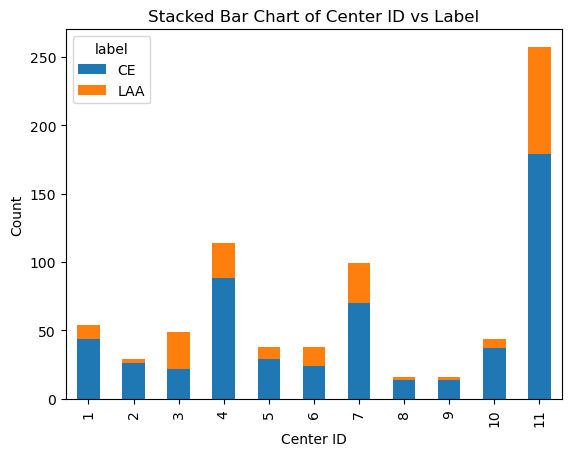

In [10]:
crosstab = pd.crosstab(df['center_id'], df['label'])
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Center ID vs Label')
plt.show()

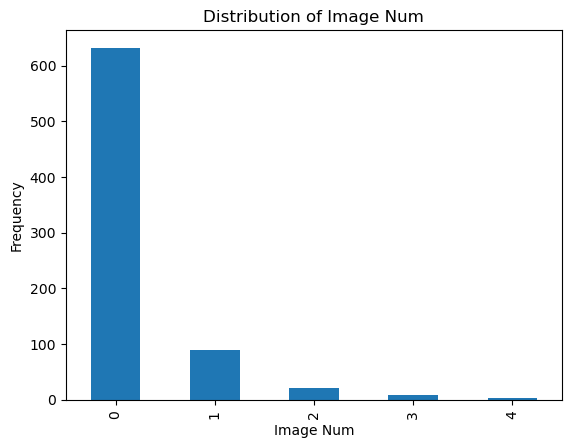

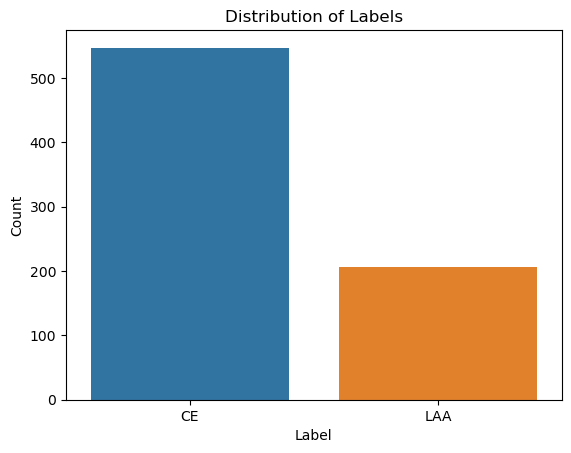

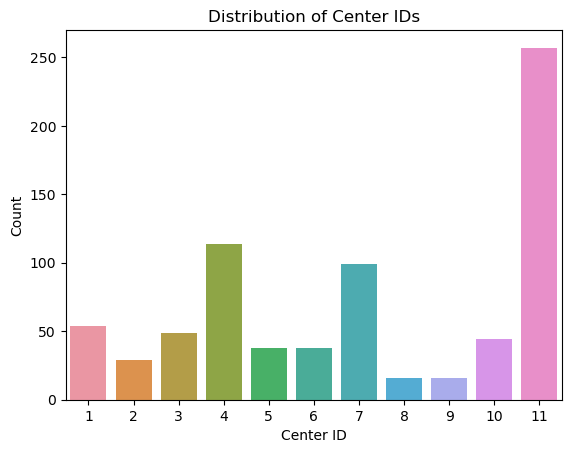

In [11]:
df['image_num'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Image Num')
plt.ylabel('Frequency')
plt.title('Distribution of Image Num')
plt.show()

# Gráfico de barras para visualizar la distribución de "label"
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

# Gráfico de barras para visualizar la distribución de "center_id"
sns.countplot(x='center_id', data=df)
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Distribution of Center IDs')
plt.show()

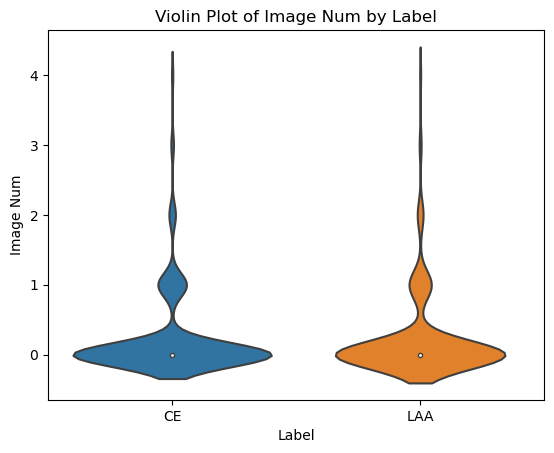

In [12]:
sns.violinplot(x='label', y='image_num', data=df)
plt.xlabel('Label')
plt.ylabel('Image Num')
plt.title('Violin Plot of Image Num by Label')
plt.show()

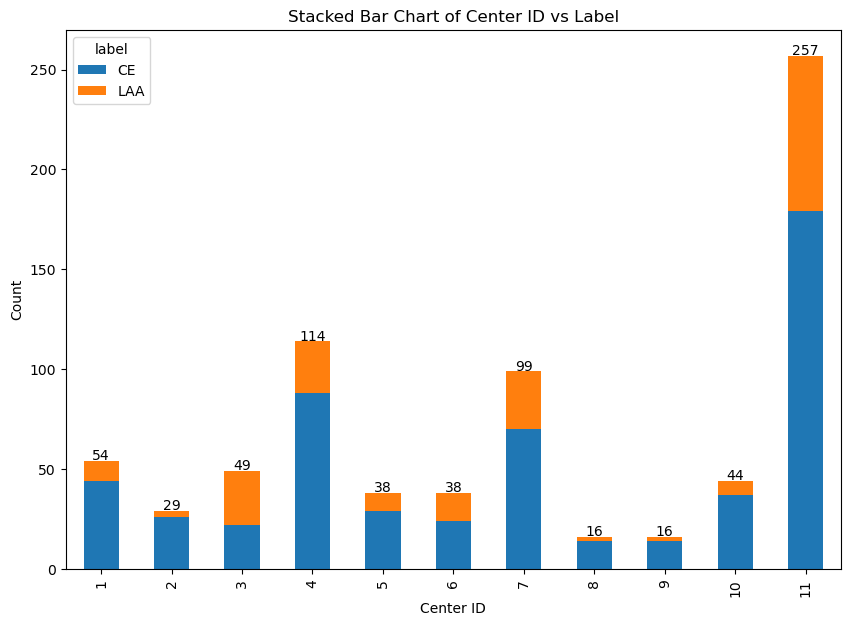

In [13]:
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Center ID vs Label')

# Añadir anotaciones de texto con el conteo total por center_id
for idx, label in enumerate(list(crosstab.index)):
    total = crosstab.loc[label].sum()
    plt.annotate(str(total), (idx, total + 0.5), ha='center')

plt.show()

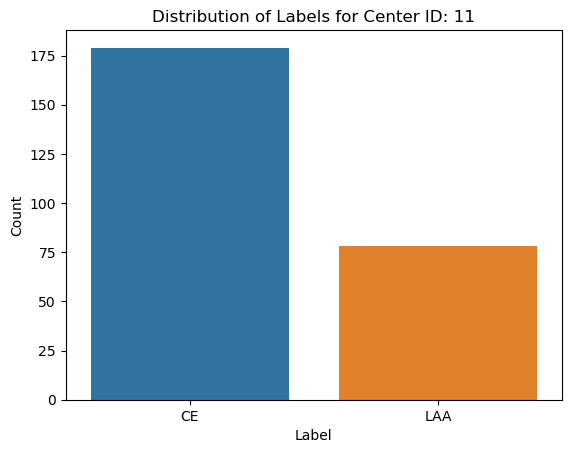

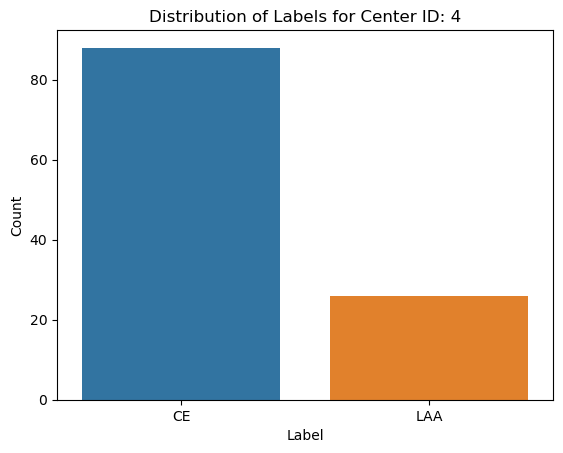

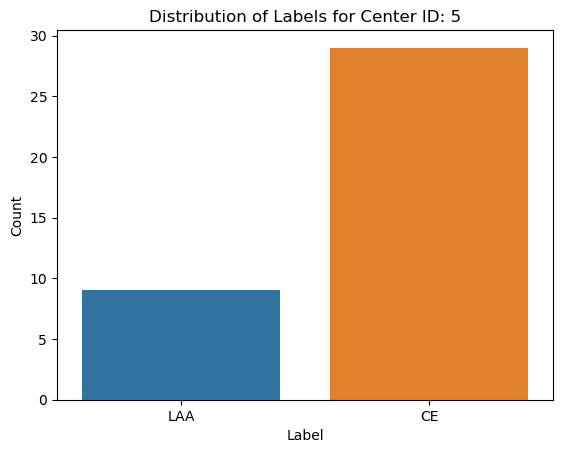

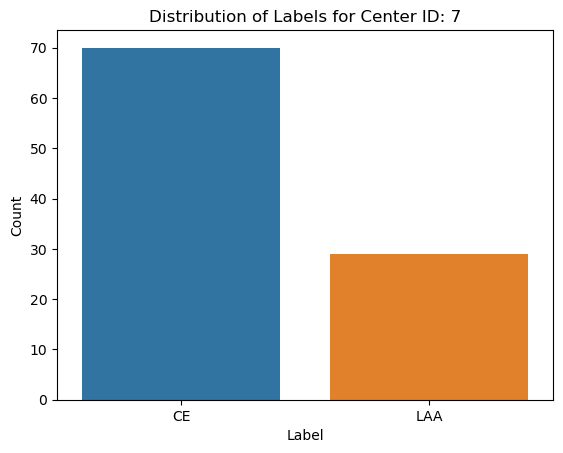

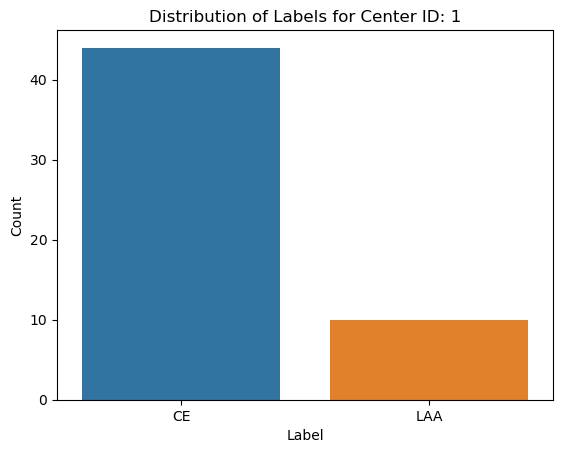

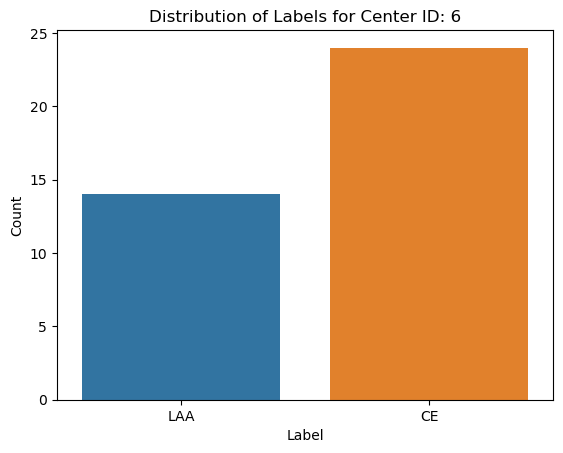

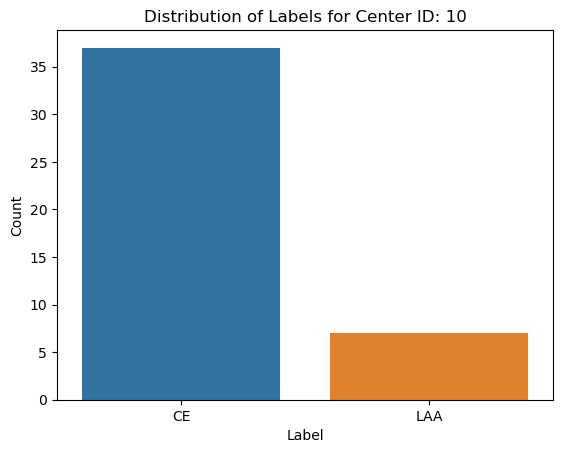

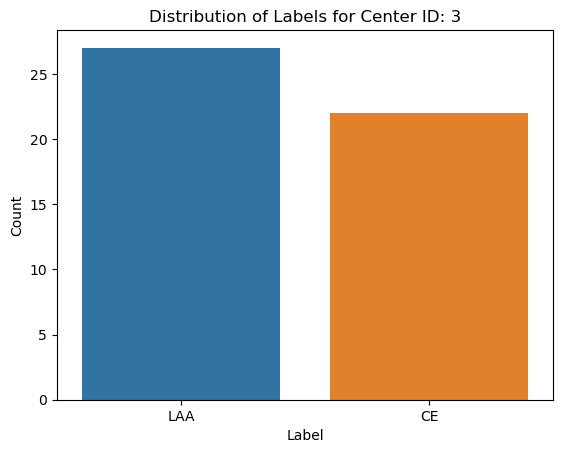

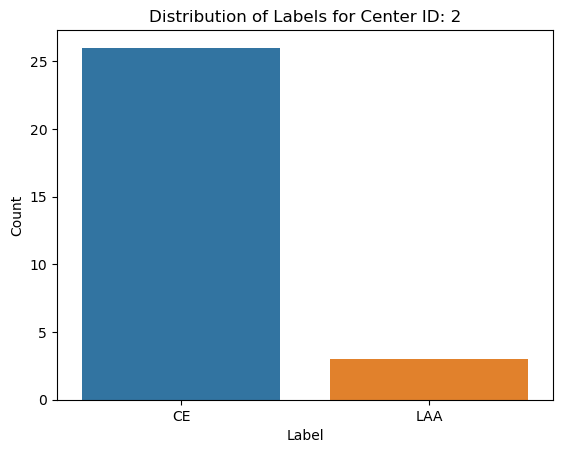

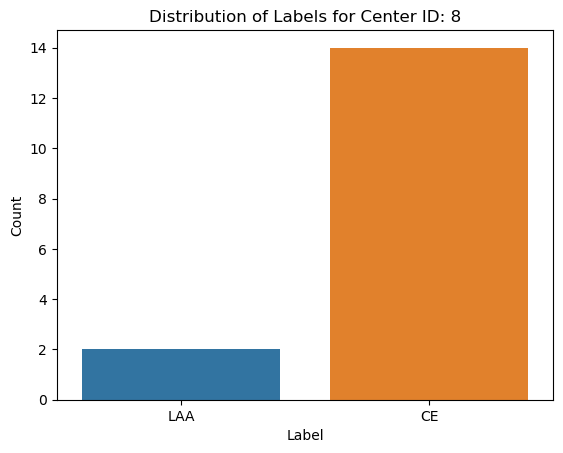

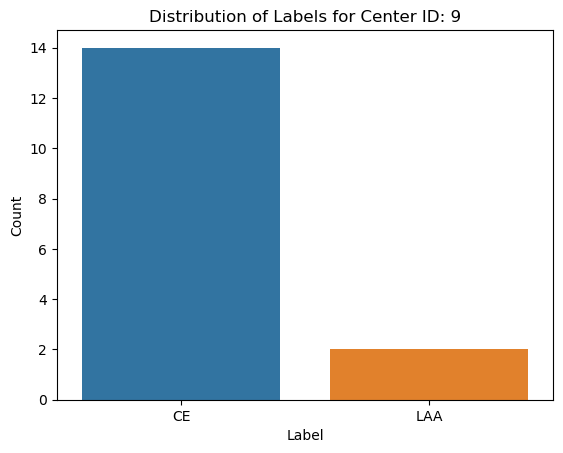

In [14]:
unique_centers = df['center_id'].unique()

for center in unique_centers:
    sns.countplot(x='label', data=df[df['center_id'] == center])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Distribution of Labels for Center ID: {center}')
    plt.show()

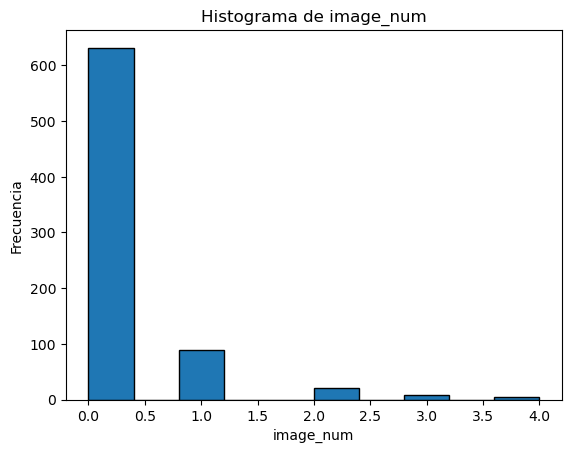

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['image_num'], bins=10, edgecolor='black')
plt.xlabel('image_num')
plt.ylabel('Frecuencia')
plt.title('Histograma de image_num')
plt.show()


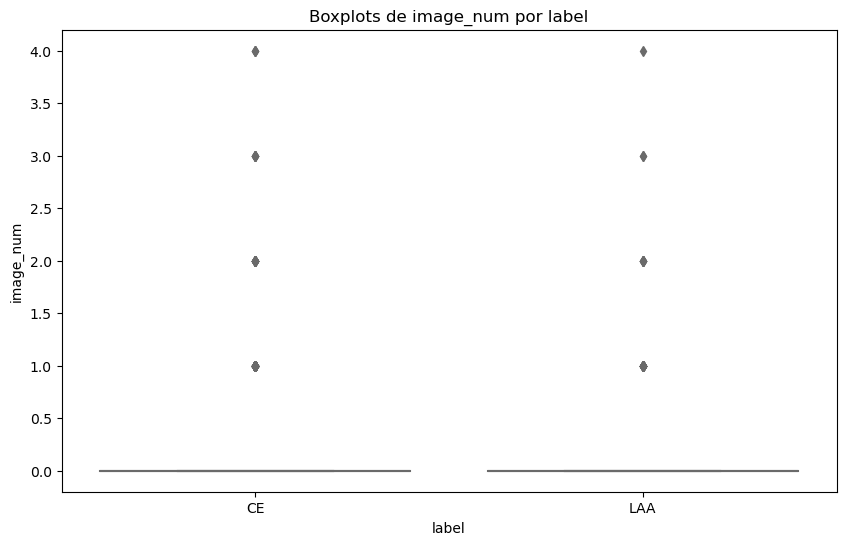

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='image_num', palette='Set3')
plt.xlabel('label')
plt.ylabel('image_num')
plt.title('Boxplots de image_num por label')
plt.show()


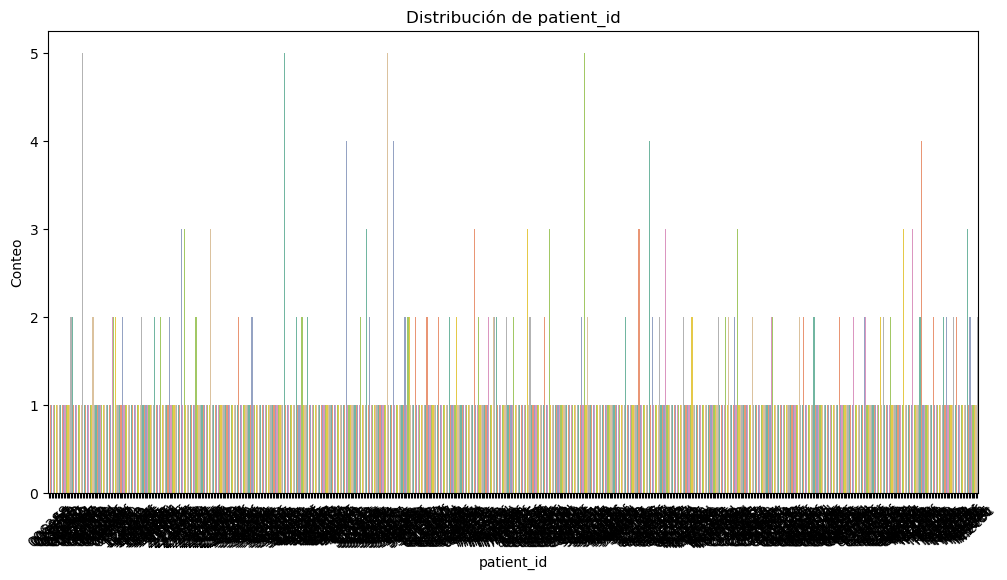

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='patient_id', palette='Set2')
plt.xlabel('patient_id')
plt.ylabel('Conteo')
plt.title('Distribución de patient_id')
plt.xticks(rotation=45)
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7564\3697400040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


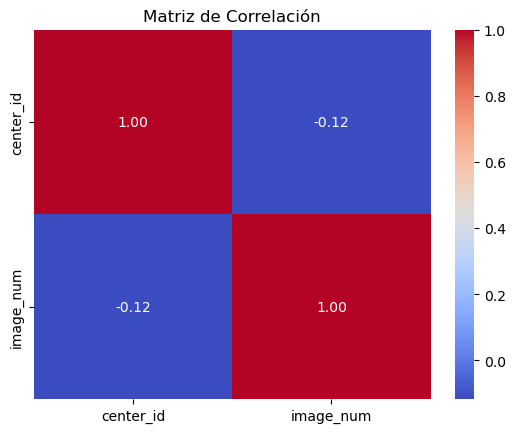

In [33]:
# Correlación de Pearson entre variables numéricas
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
